# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

In [61]:
# importing libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [62]:
# loading the data
data = np.genfromtxt('spots.txt')
data

array([24.1, 25.1, 26.6, ..., 76.3, 36.4, 31.4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


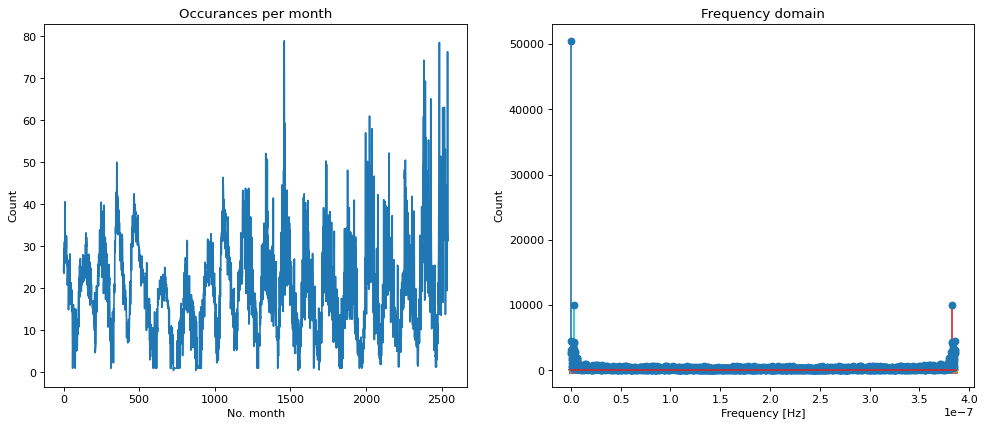

In [76]:
data_f = np.abs(np.fft.fft(data))  # applying discrete fourier transform
w = 1/(24*3600*30)  # 1/month_in_seconds, the sampling frequency
n = len(data)

freqs = np.linspace(0, w, n)


plt.figure(figsize=(15, 6), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Occurances per month')
plt.ylabel('Count')
plt.xlabel('No. month')
plt.plot(data)

plt.subplot(1, 2, 2)
plt.title('Frequency domain')
plt.stem(freqs, data_f, '-*')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Count')

plt.show()

##### In order to calculate the occurance frequency, I'll pick the two highest points (excluding the one located at the frequency equal to 0Hz).

In [74]:
occ_freq, _ = freqs[1:][data_f[1:] > 5000]
period_in_years = (1/(occ_freq))/(3600*24*30*12)

print(f'Occurance frequency [in Hz]: {occ_freq:.3e}')
print(f'The period [in years]: {period_in_years:.3f}')

Occurance frequency [in Hz]: 2.885e-09
The period [in years]: 11.145


##### The occurence frequency is then around 2.88e-9 Hz, so it happens once every 11 years.

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


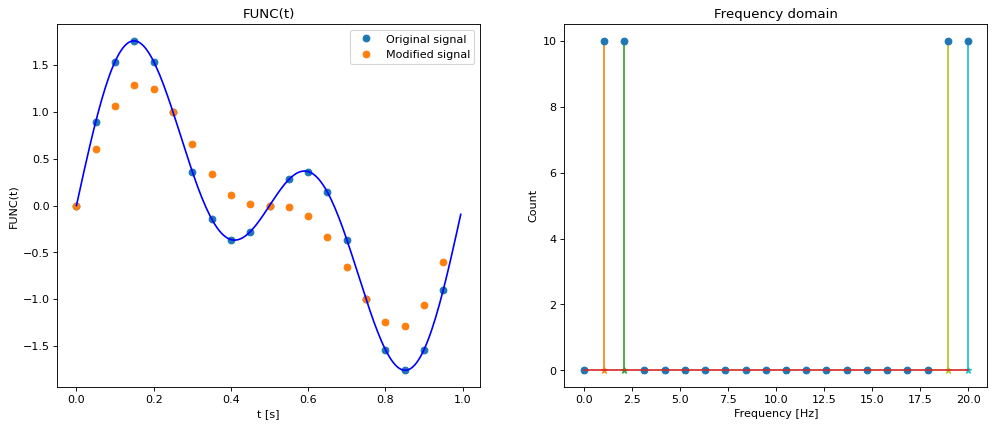

In [113]:
T = 1
w = 20
TW = 1/w
t = np.arange(0, T, TW)
n = len(t)

FUNC = lambda t: np.sin(2*np.pi*t) + np.sin(4*np.pi*t)
signal = FUNC(t)  # calculating the original signal

base_t = np.arange(0, T, 1/200)
base_signal = FUNC(base_t)  # creating a smoother original signal

signal_f = np.fft.fft(signal)  # applying discrete fourier transform
freqs = np.linspace(0, w, n)
abs_signal_f = np.abs(signal_f)

to_filter = [2]  # creating an indices mask to filter the original signal
filtered_signal_f = np.copy(signal_f)
filtered_signal_f[to_filter] = 0  # removing the 2Hz frequency

filtered_signal = np.real(np.fft.ifft(filtered_signal_f))  # applying inverse dicrete fourier transform

plt.figure(figsize=(15, 6), dpi=80)
plt.subplot(1, 2, 1)
plt.title('FUNC(t)')
plt.ylabel('FUNC(t)')
plt.xlabel('t [s]')
plt.plot(t, signal, 'o')
plt.plot(t, filtered_signal, 'o')
plt.plot(base_t, base_signal, color='blue')
plt.legend(['Original signal', 'Modified signal'])

plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
plt.title('Frequency domain')
plt.stem(freqs, abs_signal_f, '-*')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Count')

plt.show()

# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element
